In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [464]:
data_train = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/test.csv')

In [465]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [466]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [467]:
data_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [468]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [469]:
data_train = data_train.select_dtypes(exclude=['object'])
data_test = data_test.select_dtypes(exclude='object')

In [470]:
data_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


In [471]:
data_train['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [472]:
model_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [473]:
X_train = data_train.drop(columns=['Survived'])
Y_train = data_train['Survived']

In [474]:
X_test = data_test

In [475]:
model_1.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [476]:
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

In [477]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

!!! Все классы определись как единица(1)

In [478]:
accuracy_model_1 = accuracy_score(Y_train, y_pred_train)

In [479]:
accuracy_model_1

0.7377049180327869

In [480]:
data_train = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/test.csv')

На первый взгляд для построения модели нам не требуются признаки:
    - PassengerId
    - Name
    - Cabin
    - Embarked
    - Fare
    - Ticket

In [481]:
data_train = data_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Fare', 'Ticket'])
data_test = data_test.drop(columns=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Fare', 'Ticket'])

In [482]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [483]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [484]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB


In [485]:
count_rows_data_train = data_train.isnull().any(axis=1).sum()
count_rows_data_test = data_test.isnull().any(axis=1).sum()

In [486]:
repcent_drop_data_train = round(count_rows_data_train/len(data_train)*100, 1)
repcent_drop_data_test = round(count_rows_data_test/len(data_test)*100, 1)

In [487]:
print(f'Процент строк с пустыми в значениями в обучающей выборке={repcent_drop_data_train}\nПроцент строк с пустыми в значениями в тестовой выборке={repcent_drop_data_test}')

Процент строк с пустыми в значениями в обучающей выборке=19.9
Процент строк с пустыми в значениями в тестовой выборке=20.6


У нас пропуск только в поле возраст. Заполним признаки по принципу среднего возраста всех пассажиров.

In [488]:
mean_value_train = round(data_train['Age'].mean(), 1)
mean_value_test = round(data_test['Age'].mean(), 1)

In [489]:
print(f'Ср.возраст в обучающей выборке {mean_value_train}\nСр.возраст в тестовой выборке {mean_value_test}')

Ср.возраст в обучающей выборке 29.7
Ср.возраст в тестовой выборке 30.3


In [490]:
data_train['Age'].fillna(mean_value_train, inplace=True)
data_test['Age'].fillna(mean_value_test, inplace=True)

C:\Users\Корнилов\AppData\Local\Temp\ipykernel_11908\285236503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(mean_value_train, inplace=True)
C:\Users\Корнилов\AppData\Local\Temp\ipykernel_11908\285236503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [491]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [492]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,29.7,1,2
889,1,1,male,26.0,0,0


In [493]:
model_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [494]:
X_train = data_train.drop(columns=['Survived'])
Y_train = data_train['Survived']
X_train = pd.get_dummies(X_train, columns=['Sex'])

In [495]:
X_test = pd.get_dummies(data_test, columns=['Sex'])

In [496]:
X_train

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,False,True
1,1,38.0,1,0,True,False
2,3,26.0,0,0,True,False
3,1,35.0,1,0,True,False
4,3,35.0,0,0,False,True
...,...,...,...,...,...,...
886,2,27.0,0,0,False,True
887,1,19.0,0,0,True,False
888,3,29.7,1,2,True,False
889,1,26.0,0,0,False,True


In [497]:
X_test

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,34.5,0,0,False,True
1,3,47.0,1,0,True,False
2,2,62.0,0,0,False,True
3,3,27.0,0,0,False,True
4,3,22.0,1,1,True,False
...,...,...,...,...,...,...
413,3,30.3,0,0,False,True
414,1,39.0,0,0,True,False
415,3,38.5,0,0,False,True
416,3,30.3,0,0,False,True


In [498]:
model_2.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [499]:
y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

In [500]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

На первый взгляд, возможно, уже получше, т.к. модель относит наши признаки к разным классам

In [501]:
accuracy_model_2 = accuracy_score(Y_train, y_pred_train)

In [502]:
accuracy_model_2

0.7901234567901234

У первой модели точность 73%, у второй 79%.

Попробуем немного улучшить результаты(если это получится)
Для этого удалим выбросы. Воспользуемся "Ящиком с усами"

In [528]:
data_train = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/koresh123/The_problem_of_data_quality/refs/heads/main/test.csv')

In [529]:
data_train = data_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Fare', 'Ticket'])
data_test = data_test.drop(columns=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Fare', 'Ticket'])

Найдем сначала выбросы, удалим их, а оставшиеся пустые значения заполним средним.

In [530]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Boxplot для Age на train')

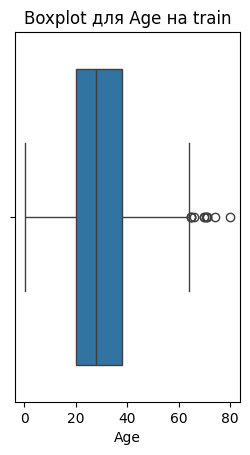

In [531]:
plt.subplot(1, 2, 1)
sns.boxplot(x=data_train['Age'])
plt.title('Boxplot для Age на train')

Видим, что условные выбросы начинаются порядка с 58 лет, но их достаточно большое кол-во
Попробуем удалить их, посмотрев, что из этого получится

In [532]:
Q1 = data_train['Age'].quantile(0.25)
Q3 = data_train['Age'].quantile(0.75)
IQR = Q3- Q1

Определение границ для выбросов

In [533]:
lower_age = Q1 - 1.5 * IQR
upper_age = Q3 + 1.5 * IQR

In [534]:
data_train = data_train[(data_train['Age'] > lower_age) | (data_train['Age'] < upper_age) | (data_train['Age'].isnull())]

In [535]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [536]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


Заполняем пропуски

In [537]:
mean_value_train = round(data_train['Age'].mean(), 1)
mean_value_test = round(data_test['Age'].mean(), 1)

data_train['Age'].fillna(mean_value_train, inplace=True)
data_test['Age'].fillna(mean_value_test, inplace=True)

C:\Users\Корнилов\AppData\Local\Temp\ipykernel_11908\3691054886.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(mean_value_train, inplace=True)
C:\Users\Корнилов\AppData\Local\Temp\ipykernel_11908\3691054886.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [538]:
model_3 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [539]:
X_train = data_train.drop(columns=['Survived'])
Y_train = data_train['Survived']
X_train = pd.get_dummies(X_train, columns=['Sex'])

In [540]:
model_3.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [541]:
y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

accuracy_model_2 = accuracy_score(Y_train, y_pred_train)

In [542]:
accuracy_model_2

0.7901234567901234

Значение accuracy практические не изменилось

Вывод:
1. Произведен отбор признаков. Применена к категориальным данным ONE HOT кодировка, заполнены пустые значения для возраста
2. Метрика model_2 на 6% лучше чем модели 1(model_1). 79% к 73%
3. При работе с моделями машинного обучения работа с данными является ключем к успеху в решении такого рода задач.